In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SimpleRNN, CuDNNLSTM,CuDNNGRU,GRU
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras import callbacks
%matplotlib inline

Using TensorFlow backend.


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"1uvQgVD6iHwTgrFWrHXMvwh8b5TpaaAqm"}) 
downloaded.GetContentFile('data.csv') 

In [0]:
df = pd.read_csv('data.csv')

In [0]:
df

,Unnamed: 0,Class,article
0,0,FarsNews,بازگشایی سوله های مدیریت بحران برای اسکان شرکت...
1,1,FarsNews,صادقیانی: مسیر صعود به المپیک دشوار نیست تیم ه...
2,2,FarsNews,حداکثر می توان با وام ۲۰۰ میلیون تومانی 0 تا ...
3,3,FarsNews,سازمان بسیج هنرمندان کشور «خاتم سلیمانی» را من...
4,4,FarsNews,آمریکا منتظر انتقامی باشد که حتی فکرش را هم نم...
...,...,...,...
396498,396498,YJC,شکست سنگین روس ها برزیلی ها همچنان روی نوار ب...
396499,396499,YJC,آخرین وضعیت جاده های مازندران محدودیت های تراف...
396500,396500,YJC,رقابت دو تیم رایکا بابل فجرسپاسی شیرازتیم رایک...
396501,396501,YJC,احداث ۲ هزار واحد مسکونی ارزان قیمت از سوی ستا...


Text(0.5, 1.0, 'Count of News for every NewsAgency')

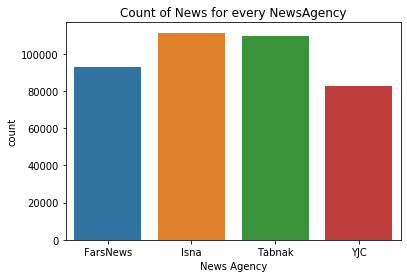

In [0]:
sns.countplot(df.Class)
plt.xlabel('News Agency')
plt.title('Count of News for every NewsAgency')

In [0]:
df.Class.value_counts()

Isna        111297
Tabnak      109698
FarsNews     92927
YJC          82581
Name: Class, dtype: int64

In [0]:
X = df.article
Y = df.Class
Y = pd.get_dummies(df['Class']).values
Y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10,random_state=20,shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(356852,) (356852, 4)
(39651,) (39651, 4)


In [0]:
# Parameter setting

# The maximum number of words to be used. (most frequent)
max_words = 10000
# Max number of words in each document.
max_len = 300

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train.values)
sequences = tok.texts_to_sequences(X_train.values)

# Pad sequencing to make all inputs in the same length of input
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print('Shape of data tensor:',sequences_matrix.shape)

Shape of data tensor: (356852, 300)


In [0]:
word_index = tok.word_index
print('Found %s unique tokens.' % len(word_index))

Found 802779 unique tokens.


In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,100,name='EmbedingLayer',input_length=max_len)(inputs)
    layer = SimpleRNN(128,name= 'GRU')(layer)
    layer = Dense(256,name='FC1',activation='relu')(layer)
    # layer = Activation('relu')(layer)
    layer = Dropout(0.5,name='NN_Layer')(layer)
    layer = Dense(4,name='out_layer',activation='softmax')(layer)
    # layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
model = RNN()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 300)               0         
_________________________________________________________________
EmbedingLayer (Embedding)    (None, 300, 100)          1000000   
_________________________________________________________________
GRU (SimpleRNN)              (None, 128)               29312     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
NN_Layer (Dropout)           (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 4)                 1028      
Total 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


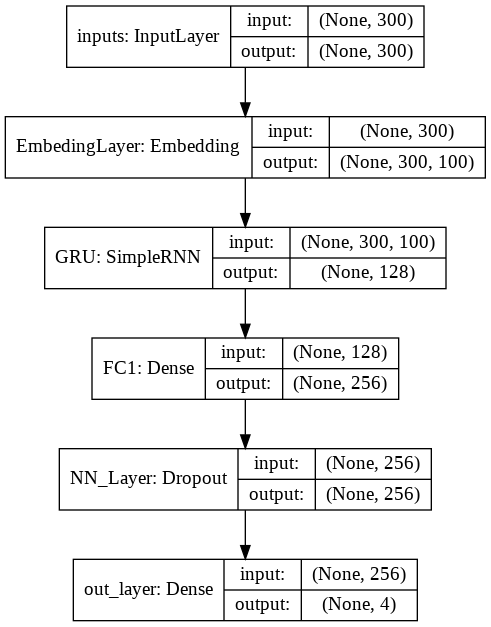

In [0]:
plot_model(model,to_file="/content/gdrive/My Drive/MyRNN/ShapeRNN.png",show_shapes=True)


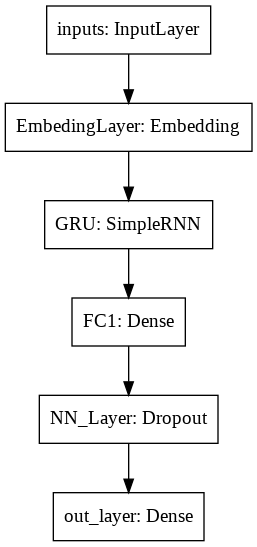

In [0]:
plot_model(model,to_file="/content/gdrive/My Drive/MyRNN/RNN.png")

In [0]:
start = datetime.datetime.now()

In [0]:
# filepath="/content/gdrive/My Drive/MyGRU/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

In [0]:
logger = callbacks.CSVLogger("/content/gdrive/My Drive/MyRNN/trainingRNN.log")
tensorboard=callbacks.TensorBoard(log_dir="/content/gdrive/My Drive/MyRNN/tensorboard")
model_checkpoint=callbacks.ModelCheckpoint("/content/gdrive/My Drive/MyRNN/model.{epoch}.h5")
model_checkpoint1=callbacks.ModelCheckpoint("/content/gdrive/My Drive/MyRNN/model.{epoch}-{val_acc:.2f}.h5",monitor='val_acc',save_best_only=True)
Callbacks = [logger,tensorboard,model_checkpoint,model_checkpoint1]

In [0]:
history = model.fit(sequences_matrix,Y_train,batch_size=256,epochs=10,
          validation_split=0.2,callbacks=Callbacks,shuffle=True)
model.save("/content/gdrive/My Drive/MyRNN/RNN-model.h5")
model.save_weights("/content/gdrive/My Drive/MyRNN/RNN-Weights.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 285481 samples, validate on 71371 samples







Epoch 1/10
285481/285481 [==============================] - 245s 857us/step - loss: 0.9467 - acc: 0.5672 - val_loss: 0.8101 - val_acc: 0.6214

Epoch 2/10
285481/285481 [==============================] - 233s 814us/step - loss: 0.9928 - acc: 0.5410 - val_loss: 1.0069 - val_acc: 0.5248
Epoch 3/10
285481/285481 [==============================] - 229s 803us/step - loss: 0.9942 - acc: 0.5353 - val_loss: 0.9849 - val_acc: 0.5310
Epoch 4/10
285481/285481 [==============================] - 227s 795us/step - loss: 0.9743 - acc: 0.5455 - val_loss: 0.9872 - val_acc: 0.5398
Epoch 5/10
285481/285481 [==============================] - 228s 797us/step - loss: 0.9596 - acc: 0.5537 - val_loss: 0.9755 - val_acc: 0.5480
Epoch 6/10
285481/285481 [==============================] - 226s 793us/step - loss: 0.9449 - acc: 0.5639 - val_loss: 0.9718 - val_acc:

In [0]:
end = datetime.datetime.now()
elapsed = end - start
print('total training time:',str(elapsed))

total training time: 0:38:36.200756


In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

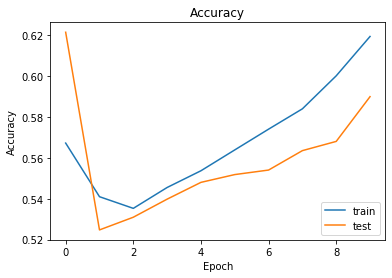

In [0]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show();

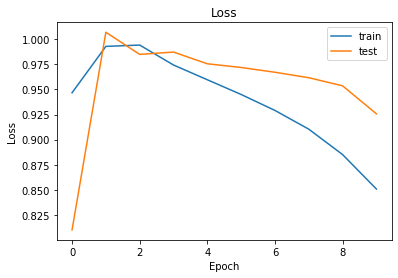

In [0]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show();

In [0]:
accr = model.evaluate(test_sequences_matrix,Y_test)

39651/39651 [==============================] - 137s 3ms/step


In [0]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.919
  Accuracy: 0.591
